In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [2]:
train1=pd.read_csv('./train/train1.csv')
train9=pd.read_csv('./train/train9.csv')
hero_data=pd.read_csv('./train/hero_data.csv')
test1=pd.read_csv('./test/test1.csv')
test9=pd.read_csv('./test/test9.csv')

In [3]:
print(train1.head())
print(train9.head())
print(test1.head())
print(test9.head())


   user_id  hero_id     id  num_games  num_wins    kda_ratio
0        1       41   1_41        201       125  3731.707317
1        2       17   2_17        427       234  2922.058381
2        5      106  5_106        240       130  5116.682739
3        6       65   6_65        206       122  4131.553861
4        7       69   7_69        697       382  2474.469306
   user_id  hero_id     id  num_games  num_wins    kda_ratio
0        1       74   1_74        304       185  3743.699732
1        1       65   1_65        255       151  4009.021513
2        1       39   1_39        203       135  5094.621514
3        1      106  1_106        158       106  4619.212963
4        1        2    1_2        157        94  2871.627907
   user_id  hero_id     id  num_games
0        3       53   3_53        278
1        4       17   4_17        180
2        9       51   9_51         70
3       10       54  10_54        189
4       15       74  15_74        263
   user_id  hero_id     id  num_games  n

In [4]:
train1 = pd.merge(train1, hero_data,on='hero_id')
train9 = pd.merge(train9, hero_data,on='hero_id')
test1 = pd.merge(test1, hero_data,on='hero_id')
test9 = pd.merge(test9, hero_data,on='hero_id')


In [5]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 28 columns):
user_id                  2094 non-null int64
hero_id                  2094 non-null int64
id                       2094 non-null object
num_games                2094 non-null int64
num_wins                 2094 non-null int64
kda_ratio                2094 non-null float64
primary_attr             2094 non-null object
attack_type              2094 non-null object
roles                    2094 non-null object
base_health              2094 non-null int64
base_health_regen        2094 non-null float64
base_mana                2094 non-null int64
base_mana_regen          2094 non-null float64
base_armor               2094 non-null float64
base_magic_resistance    2094 non-null int64
base_attack_min          2094 non-null int64
base_attack_max          2094 non-null int64
base_strength            2094 non-null int64
base_agility             2094 non-null int64
base_intelligence        2

In [6]:
from sklearn.preprocessing import LabelEncoder
cat=['primary_attr','attack_type','roles']
for col in cat:
    l=LabelEncoder()
    l.fit(hero_data[col])
    train1[col]=l.transform(train1[col])
    test1[col]=l.transform(test1[col])
    train9[col]=l.transform(train9[col])
    test9[col]=l.transform(test9[col])
train1=train1.drop(['id','base_mana_regen','base_mana','base_health'],axis=1)
train9=train9.drop(['id','base_mana_regen','base_mana','base_health'],axis=1)    
test1=test1.drop(['base_mana_regen','base_mana','base_health'],axis=1)
test9=test9.drop(['base_mana_regen','base_mana','base_health'],axis=1)    

In [7]:
train=train1.append(train9,ignore_index=True).append(test9,ignore_index=True)
train=train[train1.columns]

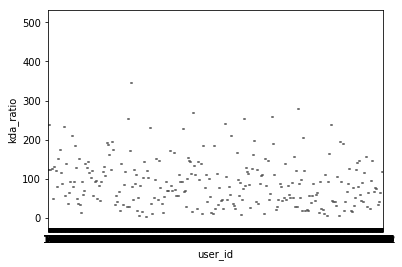

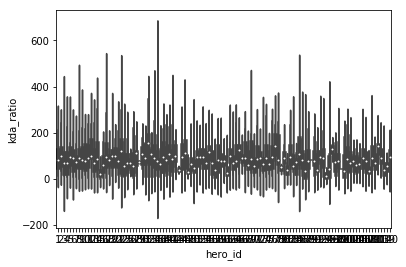

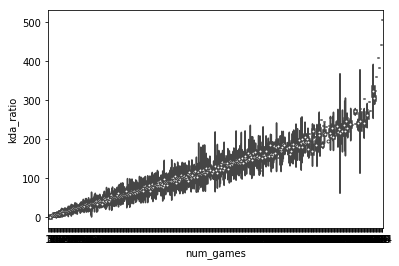

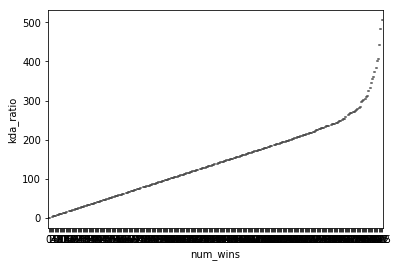

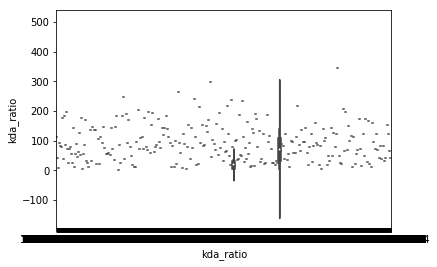

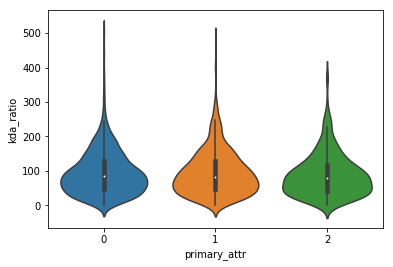

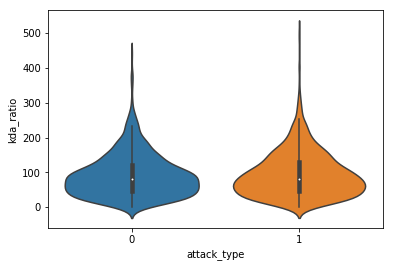

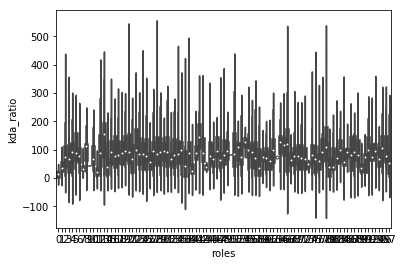

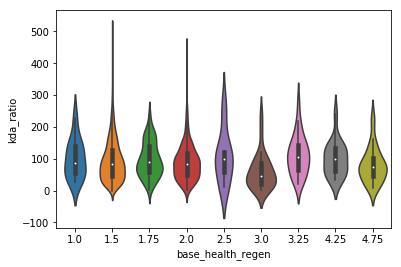

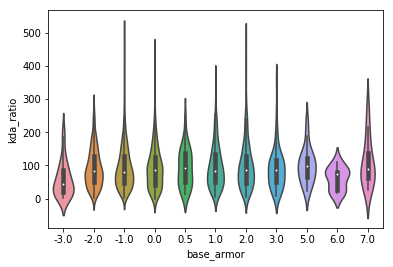

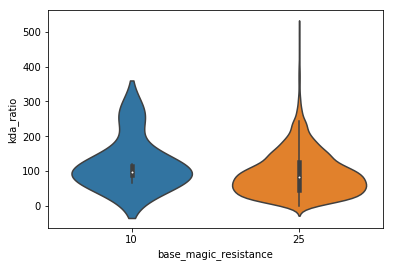

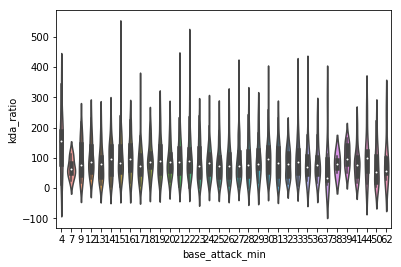

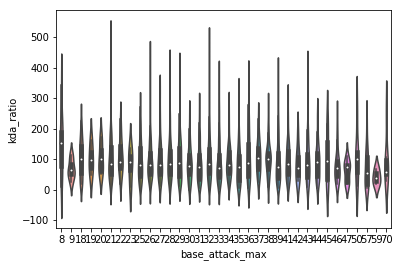

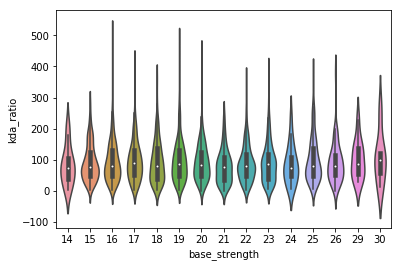

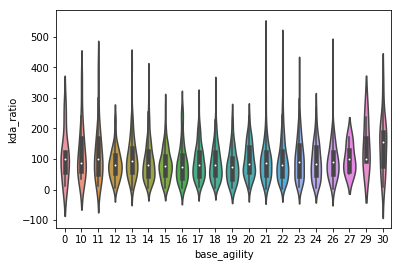

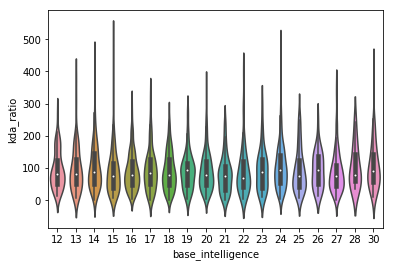

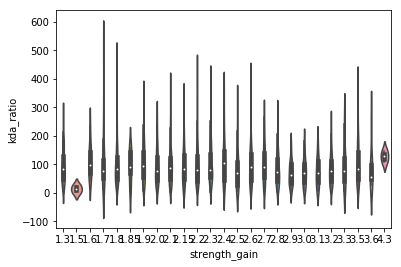

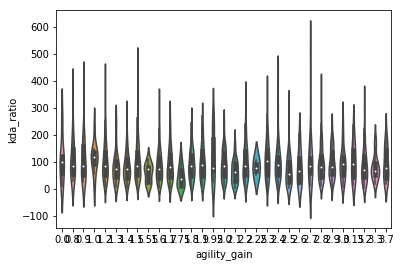

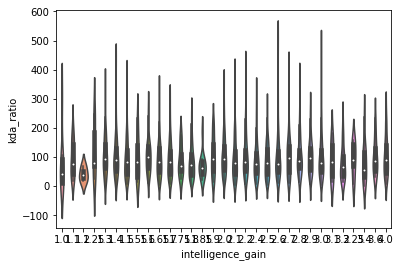

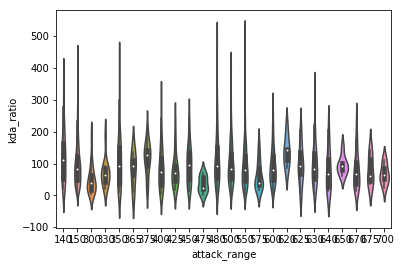

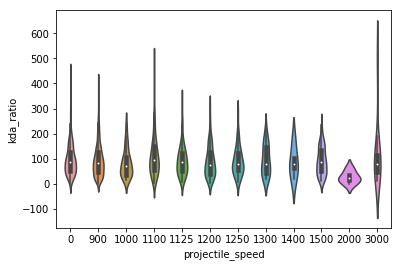

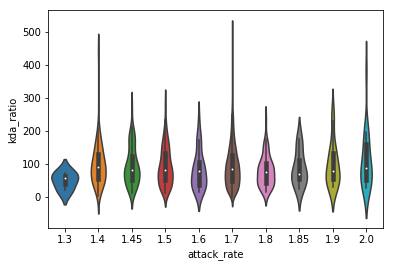

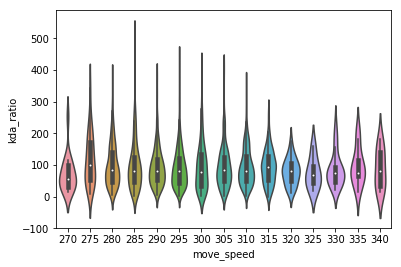

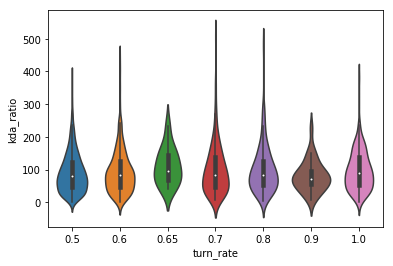

In [8]:
for x in train1.columns:
    sns.violinplot(train1[x],train1['num_wins'])#,'.')
    plt.xlabel(x)
    plt.ylabel('kda_ratio')
    plt.show()

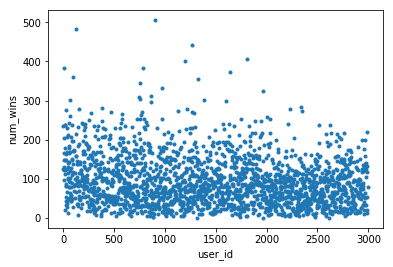

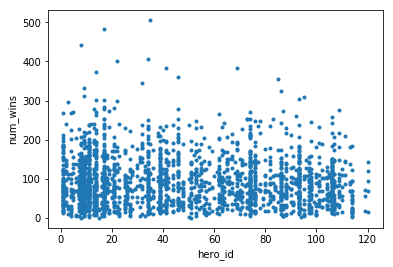

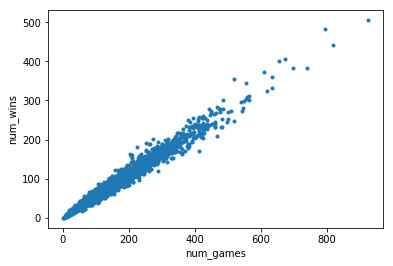

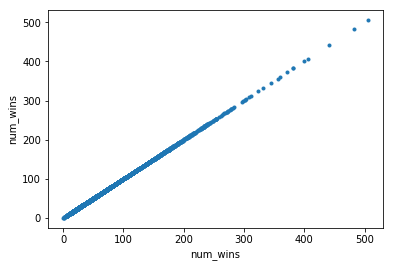

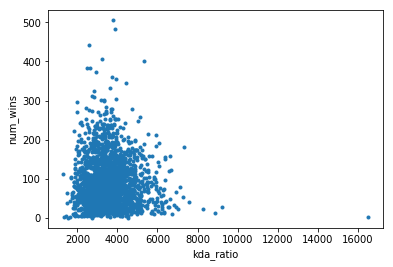

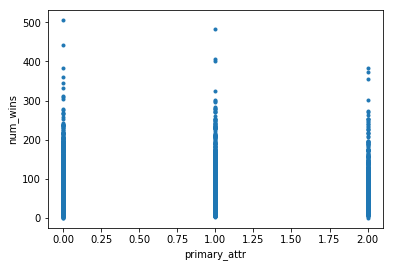

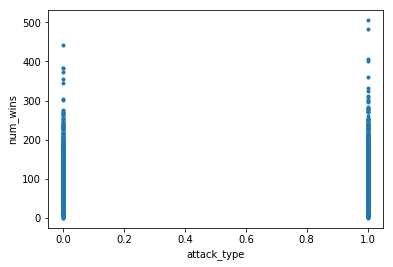

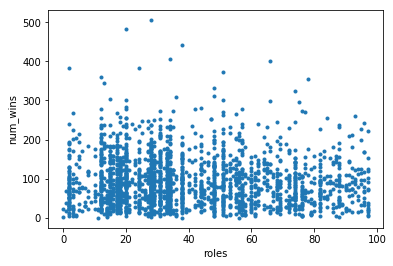

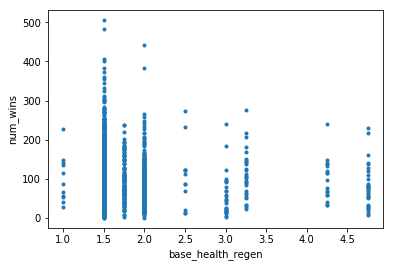

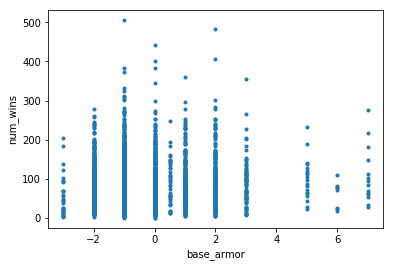

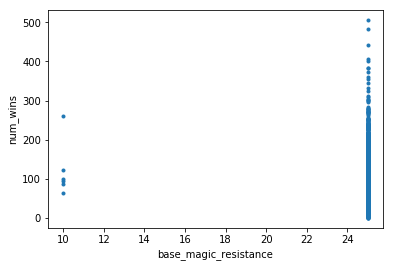

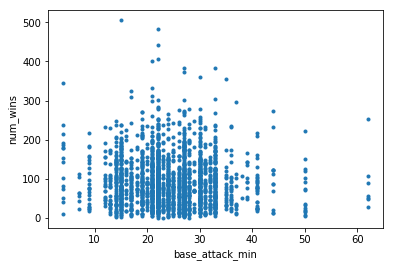

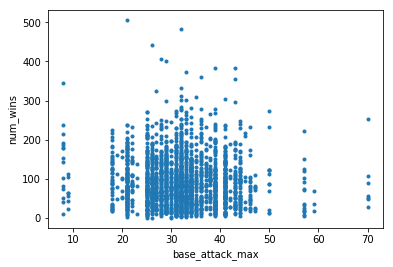

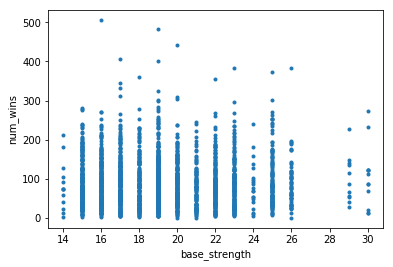

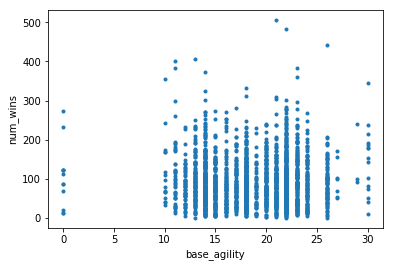

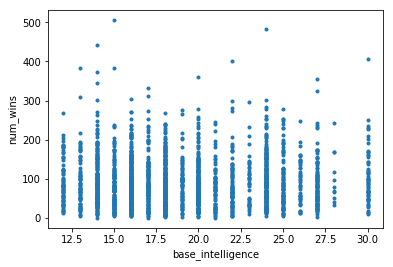

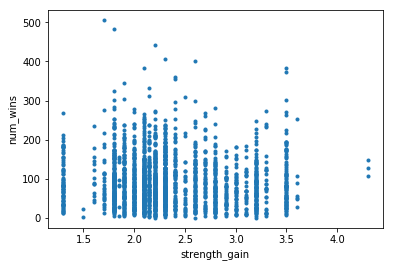

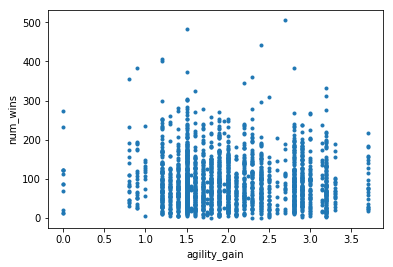

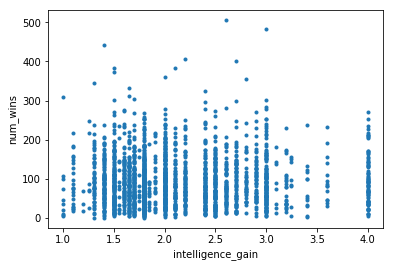

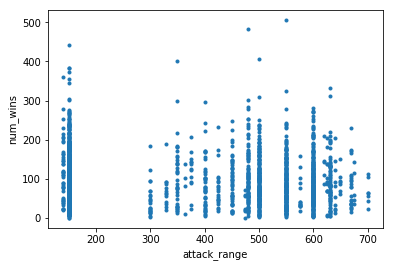

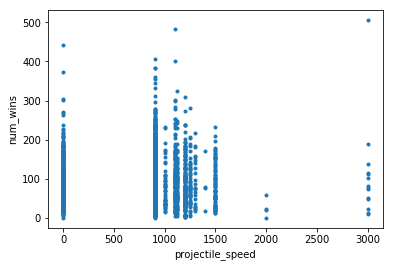

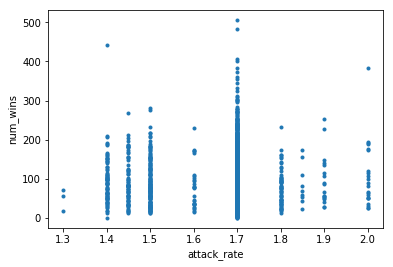

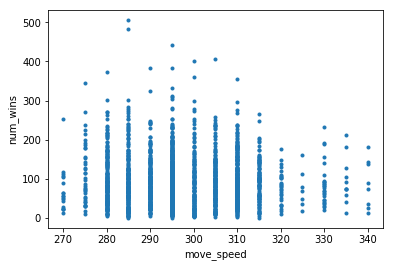

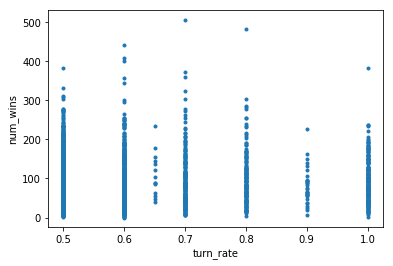

In [9]:
for x in train1.columns:
    plt.plot(train1[x],train1['num_wins'],'.')
    plt.xlabel(x)
    plt.ylabel('num_wins')#'kda_ratio')
    plt.show()

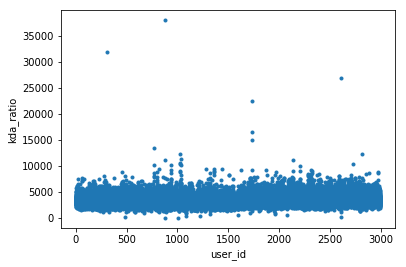

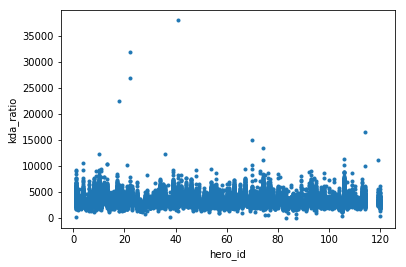

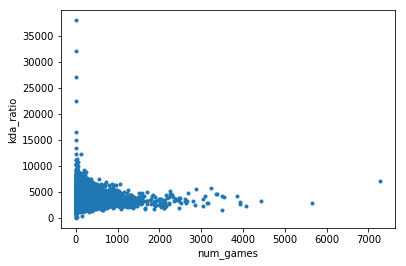

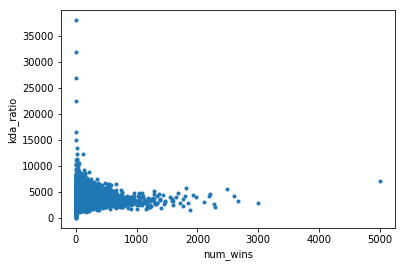

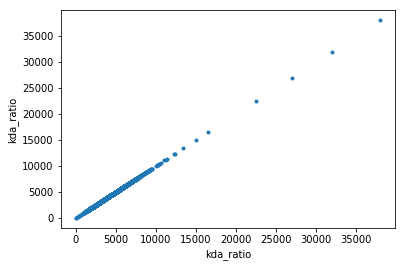

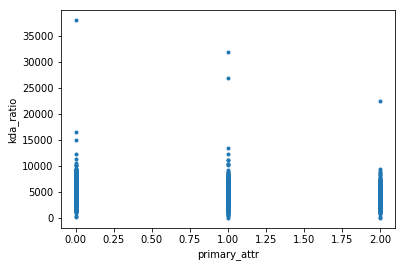

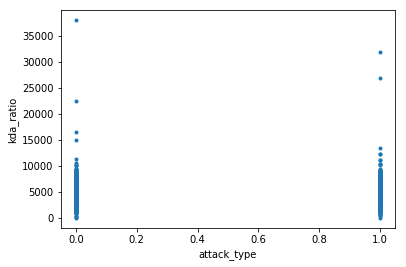

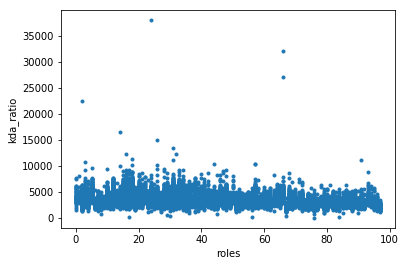

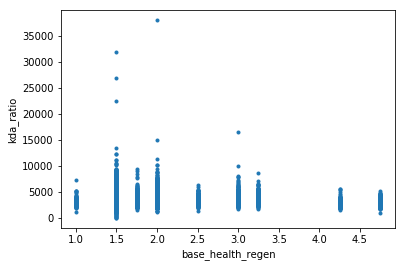

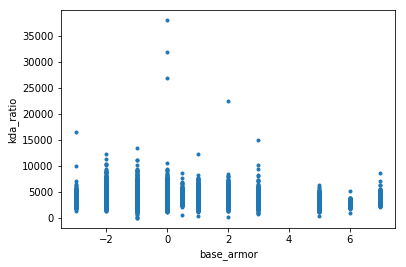

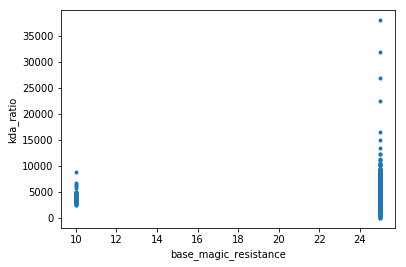

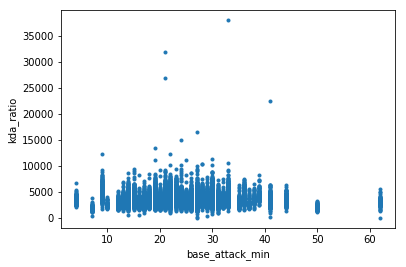

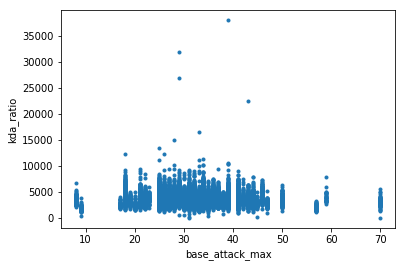

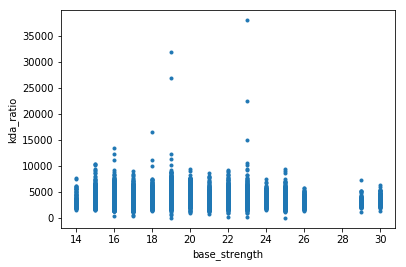

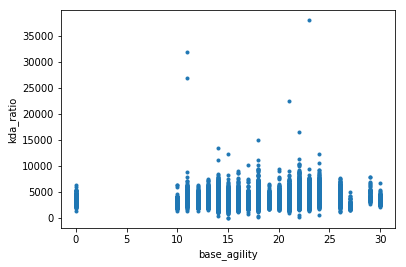

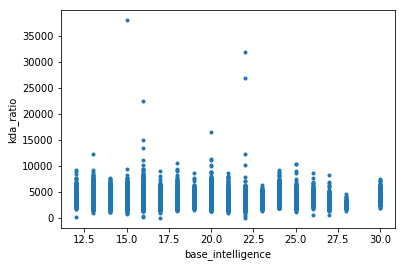

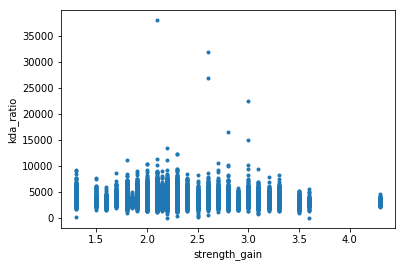

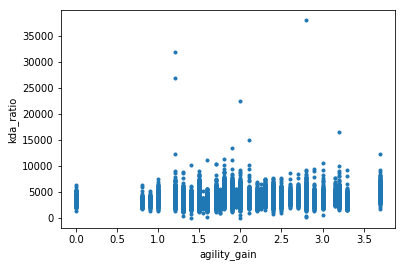

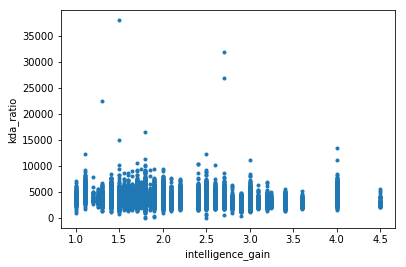

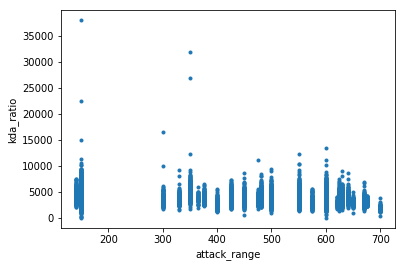

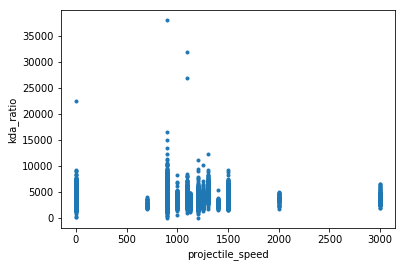

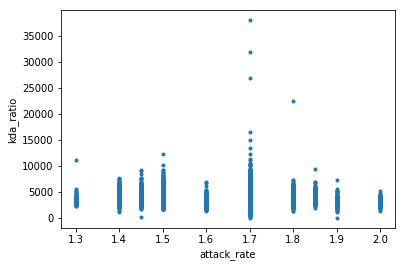

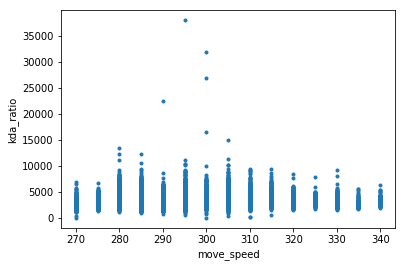

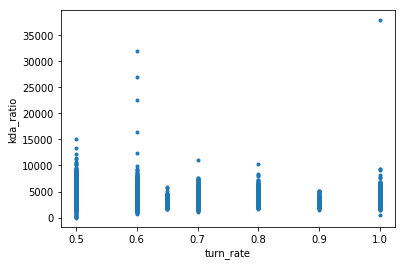

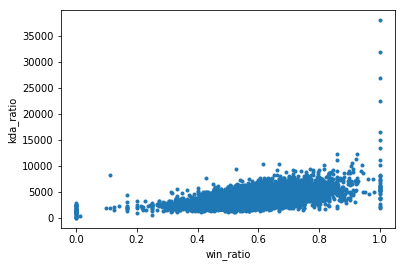

In [33]:
for x in train.columns:
    plt.plot(train[x],train['kda_ratio'],'.')
    plt.xlabel(x)
    plt.ylabel('kda_ratio')#'kda_ratio')
    plt.show()

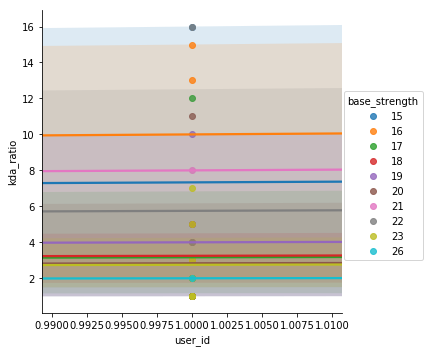

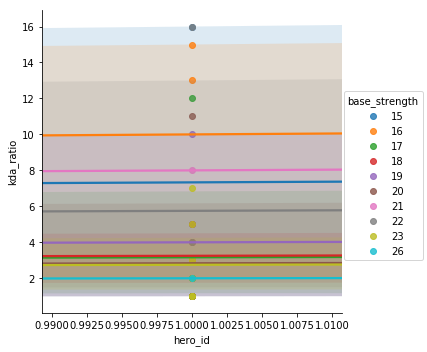

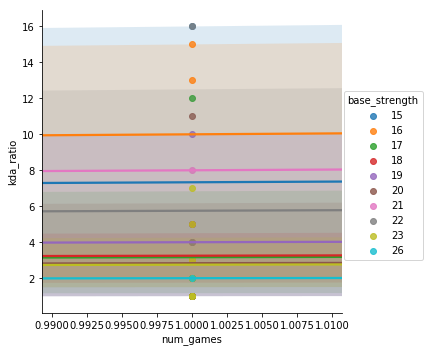

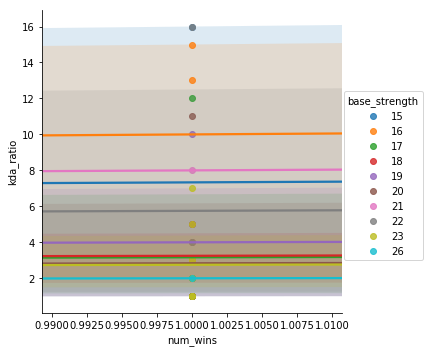

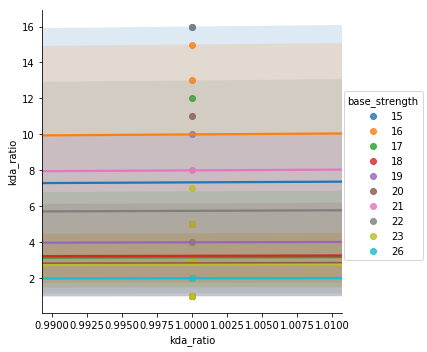

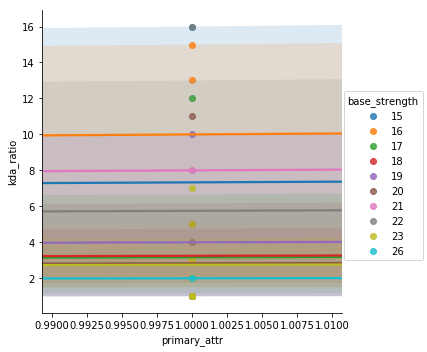

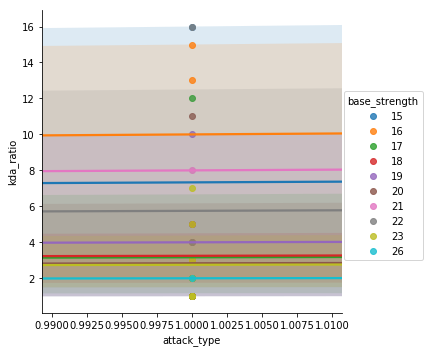

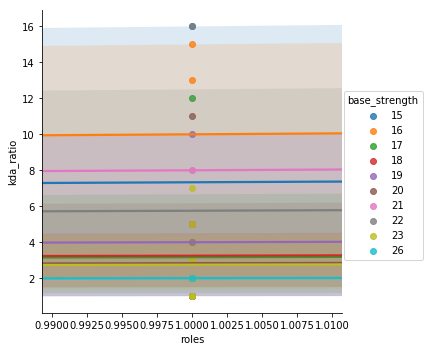

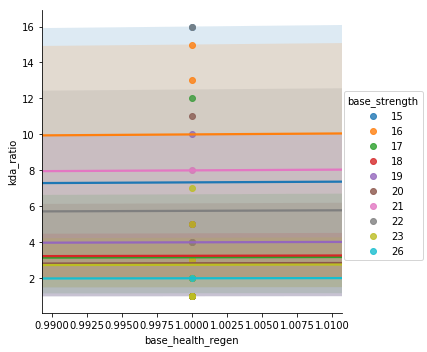

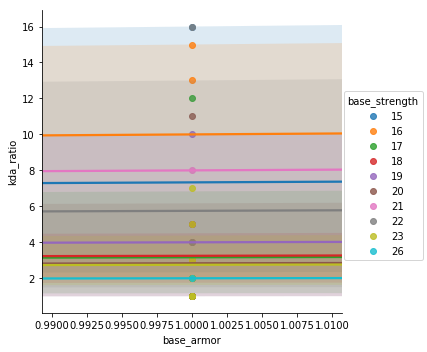

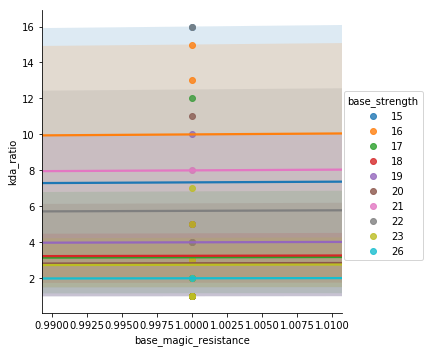

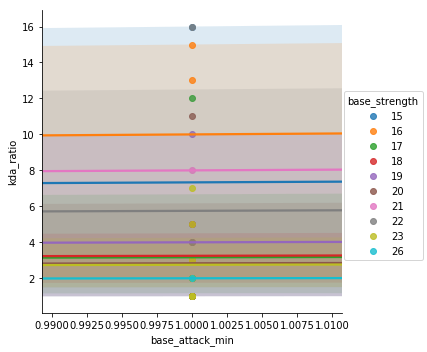

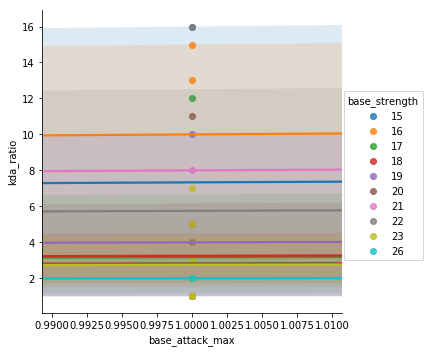

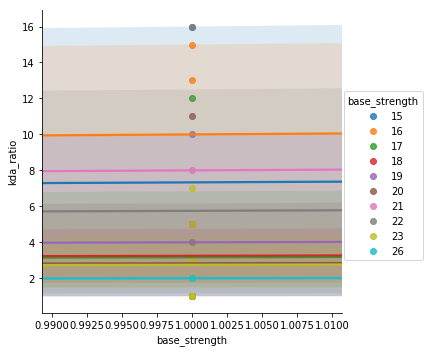

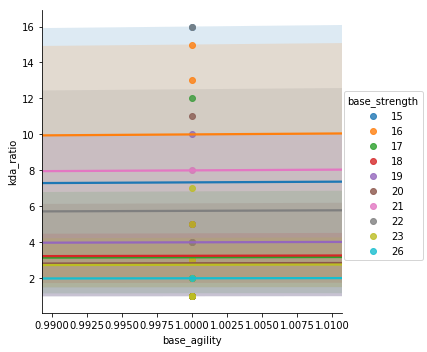

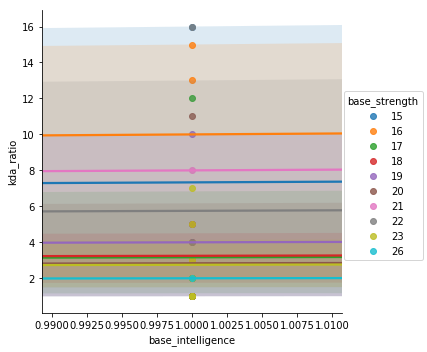

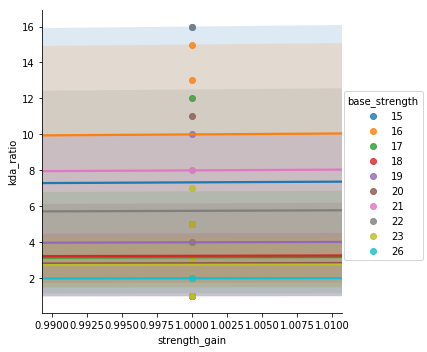

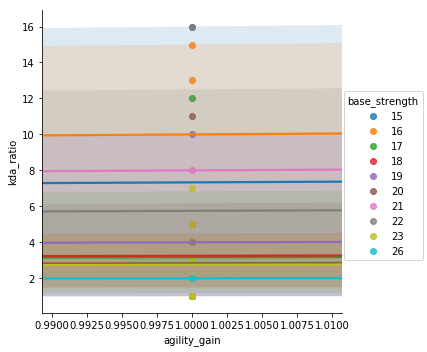

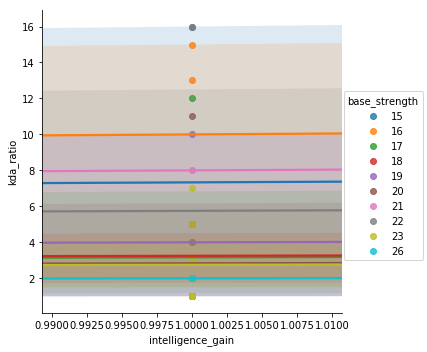

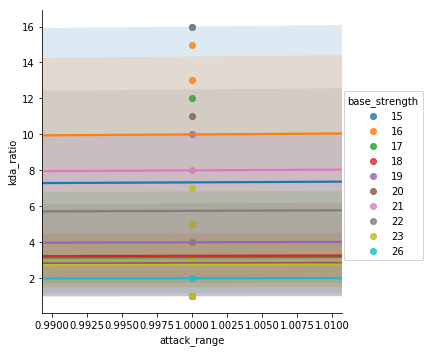

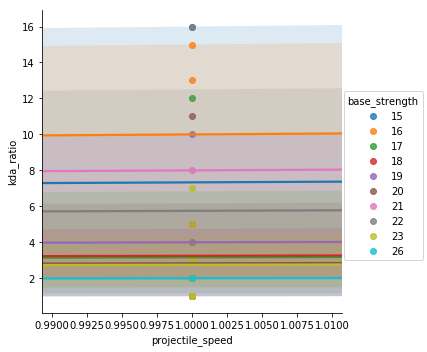

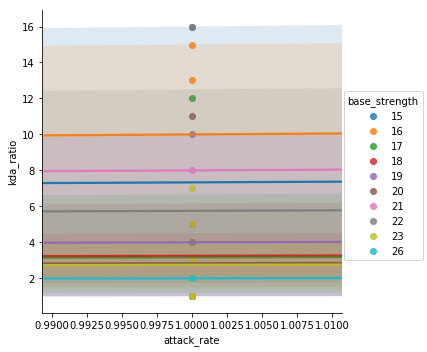

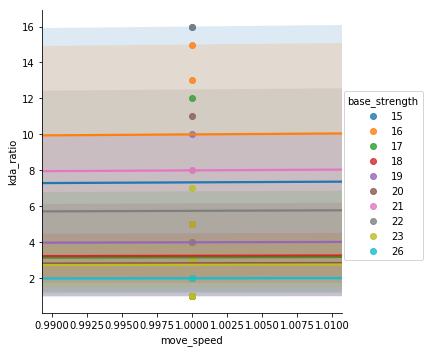

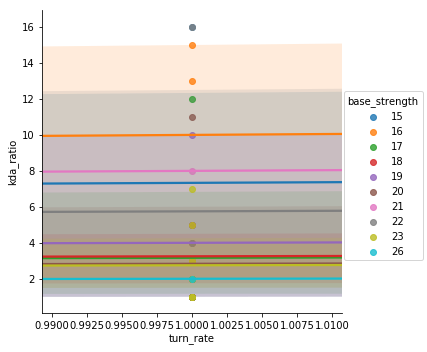

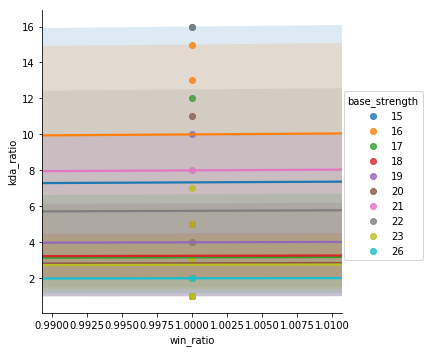

In [49]:
data_piece=train.loc[train['win_ratio']==1]
for x in train.columns:
    sns.lmplot(x=col,y='num_wins',hue='base_strength',data=data_piece)
    plt.xlabel(x)
    plt.ylabel('kda_ratio')#'kda_ratio')
    plt.show()

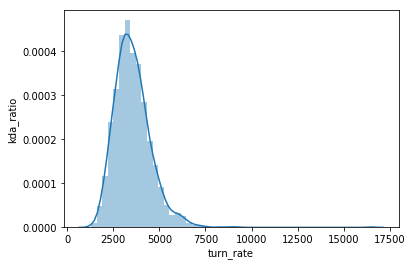

In [10]:
sns.distplot(train1['kda_ratio'])
plt.xlabel(x)
plt.ylabel('kda_ratio')
plt.show()

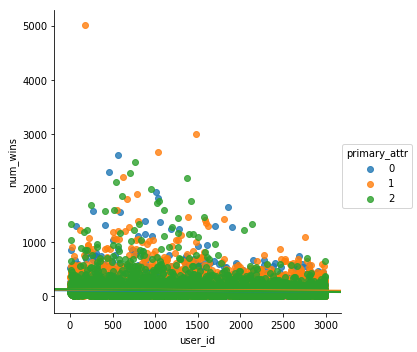

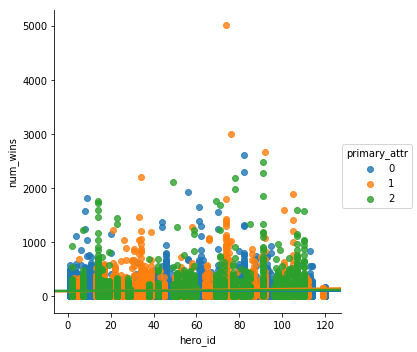

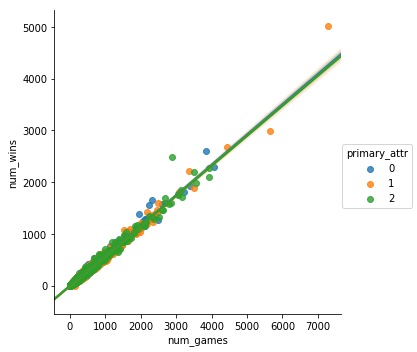

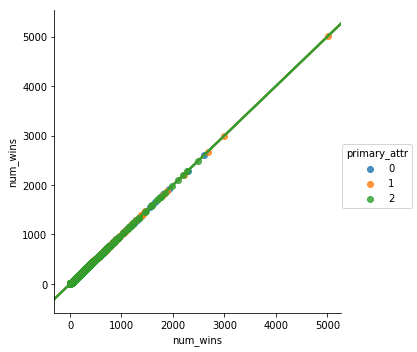

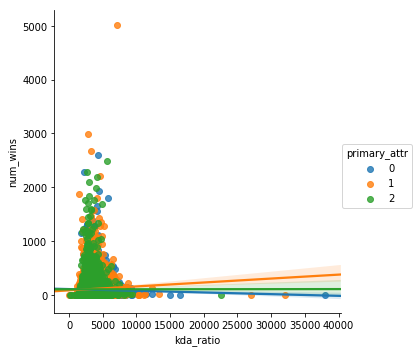

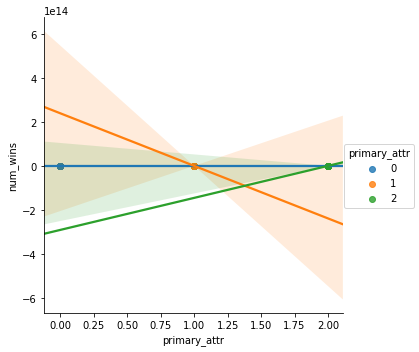

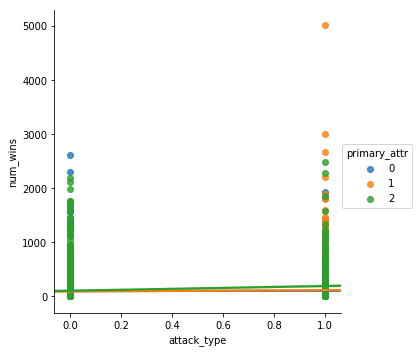

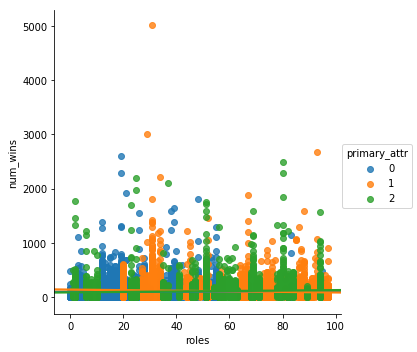

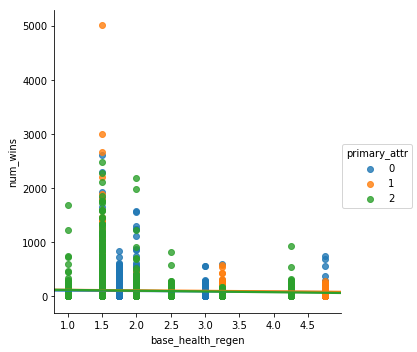

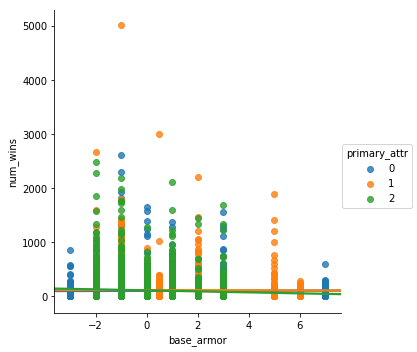

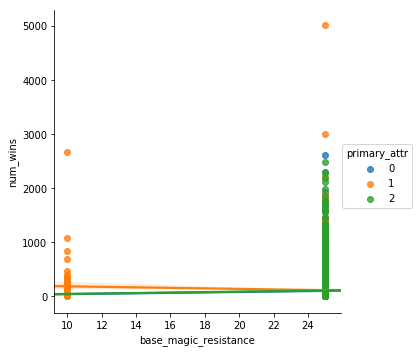

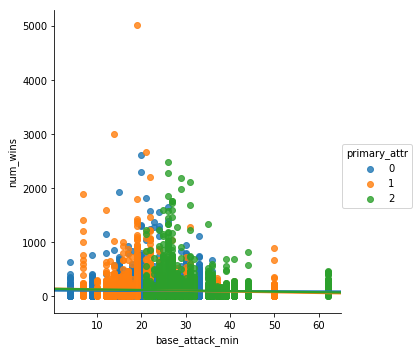

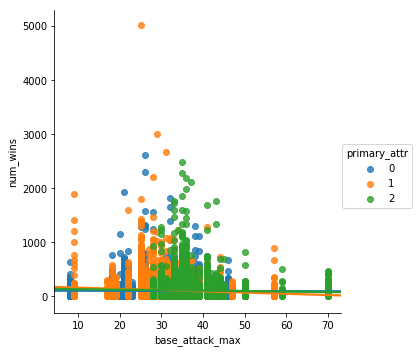

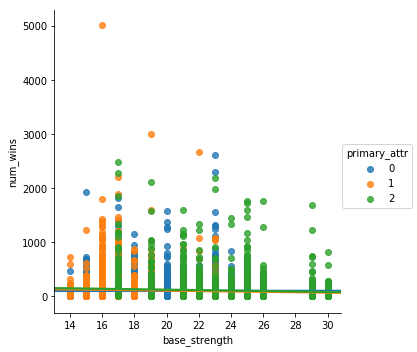

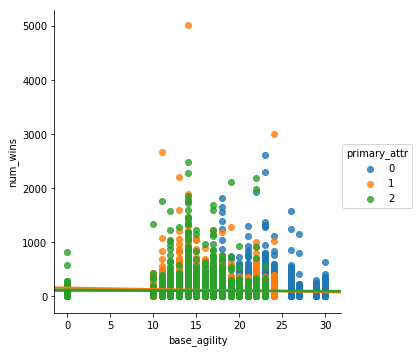

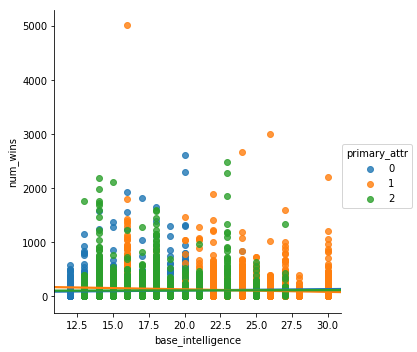

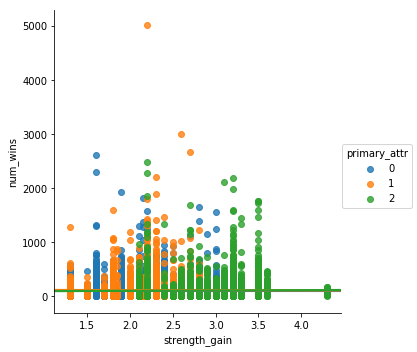

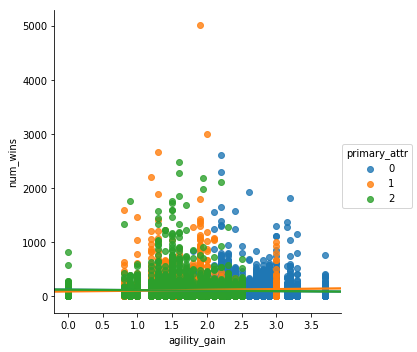

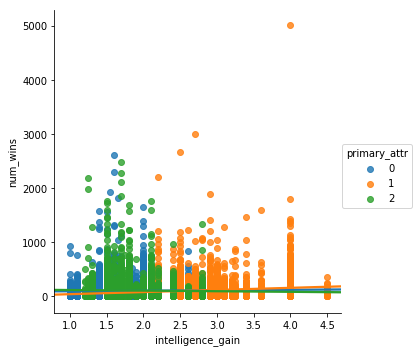

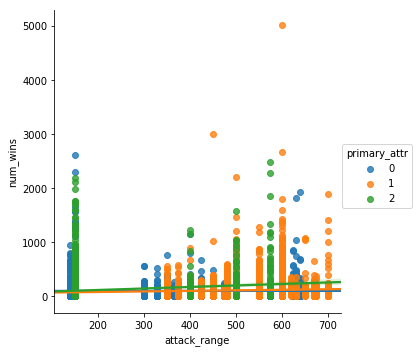

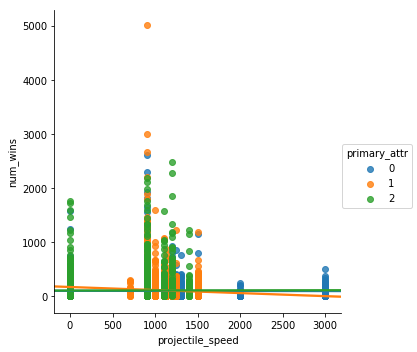

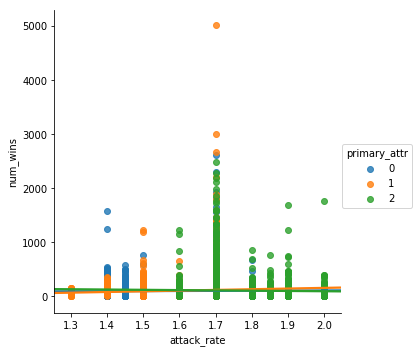

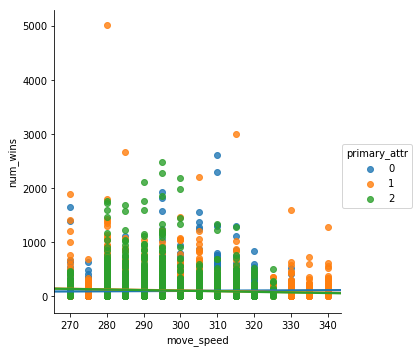

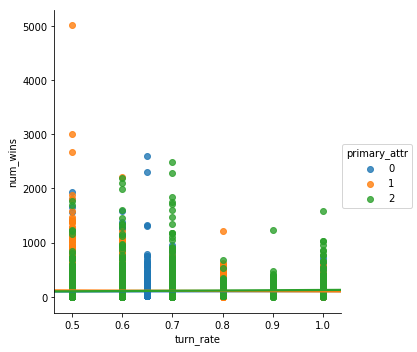

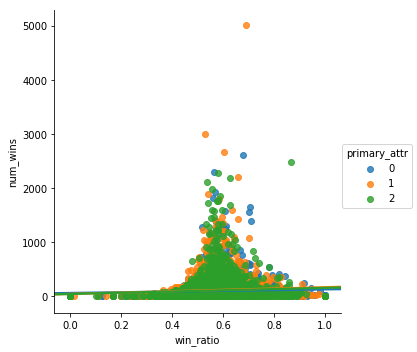

In [39]:
for col in train.columns:
    sns.lmplot(x=col,y='num_wins',hue='primary_attr',data=train)
    plt.show()

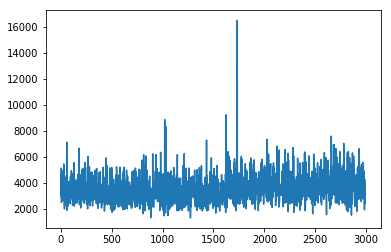

In [12]:
mat=train1.groupby('user_id').mean()['kda_ratio']
plt.plot(mat)
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(y_actual,y_predicted):
    rms = sqrt(mean_squared_error(y_actual, y_predicted))
    return rms

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train.drop(['kda_ratio'],axis=1),train['kda_ratio'],random_state=15)


In [16]:
#x_train=x_train.drop('base_intelligence',axis=1)
#x_test=x_test.drop('base_intelligence',axis=1)
main_col1=['user_id','hero_id','num_games','num_wins','new']
for df in x_test,x_train:
    df['new']=df['num_wins']/df['num_games']

In [28]:
#x_value=range(0,20)
x_value=np.linspace(0.01,1,100)
sco=[]
for x in x_value:    
        #for y in x_train.columns:
        main_col=['user_id','num_games','num_wins','new','attack_type','intelligence_gain','primary_attr','roles','strength_gain',x]
        reg=xgb.XGBRegressor(n_estimators=200,colsample_bylevel=x
                             ,max_depth=4
                             ,min_child_weight=0
                             ,random_state=1)
        reg.fit(x_train,y_train)
        pred=reg.predict(x_test)
        score=rmse(y_test,pred)
        print(x,score)
        sco.append(score)
#plt.plot(x_train.columns,sco)
plt.plot(x_value,sco)
plt.show()

0.01 763.5017823456382
0.02 763.5017823456382
0.03 763.5017823456382
0.04 763.5017823456382
0.05 763.5017823456382
0.06 763.5017823456382
0.07 763.5017823456382
0.08 763.5017823456382
0.09 735.5879517515677
0.1 735.5879517515677
0.11 735.5879517515677
0.12 735.5879517515677
0.13 733.7257068385203
0.14 733.7257068385203
0.15 733.7257068385203
0.16 733.7257068385203
0.17 743.6913452108831
0.18 743.6913452108831
0.19 743.6913452108831
0.2 743.6913452108831
0.21 729.9166122984507
0.22 729.9166122984507
0.23 729.9166122984507
0.24 729.9166122984507
0.25 734.7546532446167
0.26 734.7546532446167
0.27 734.7546532446167
0.28 734.7546532446167


KeyboardInterrupt: 

In [75]:
from sklearn.linear_model import LinearRegression
reg=xgb.XGBRegressor(n_estimators=200,max_depth=7,random_state=1)
reg.fit(train.drop(['kda_ratio','num_wins','win_ratio'],axis=1),train['num_wins'])
pred=reg.predict(test1.drop(['id','num_wins','win_ratio'],axis=1))
        
reg=LinearRegression()
reg.fit(train.drop(['kda_ratio','num_wins','win_ratio'],axis=1),train['num_wins'])
pred2=reg.predict(test1.drop(['id','num_wins','win_ratio'],axis=1))

test1['num_wins']=np.round((pred+pred2)/2)
test1.loc[test1.num_wins<=0,'num_wins']=0
test1.loc[test1.num_wins>=test1.num_games,'num_wins']=test1.loc[test1.num_wins>=test1.num_games,'num_games']


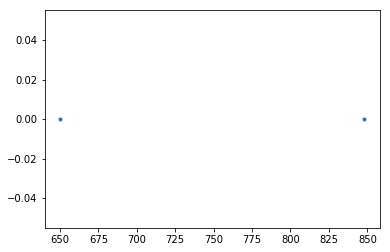

In [76]:
x=test1[test1['num_wins']<=0]['num_wins']
plt.plot(x,'.')

In [77]:
for df in test1,train:
    df['win_ratio']=df['num_wins']/df['num_games']

In [72]:
main_col=['user_id','hero_id','num_games','num_wins','win_ratio','attack_type','intelligence_gain','primary_attr','roles','strength_gain']

In [78]:
reg1=xgb.XGBRegressor(n_estimators=200)
reg1.fit(train.drop(['kda_ratio'],axis=1),train['kda_ratio'])
pred1=reg1.predict(test1.drop(['id',],axis=1)[train.drop(['kda_ratio'],axis=1).columns])

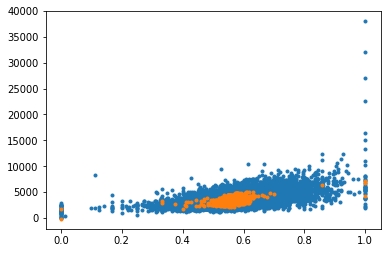

In [79]:
plt.plot(train['win_ratio'],train['kda_ratio'],'.')
plt.plot(test1['win_ratio'],pred1,'.')

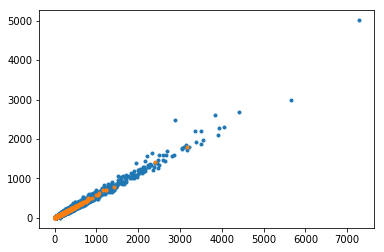

In [80]:
plt.plot(train['num_games'],train['num_wins'],'.')
plt.plot(test1['num_games'],test1['num_wins'],'.')

In [81]:
test1['kda_ratio']=pred1
sub=pd.read_csv('sample_submission.csv')
for index,x in test1.iterrows():
        sub.loc[sub.id==x.id,'kda_ratio']=x.values[-1]   
sub.to_csv('first_sub.csv',index=False) 

In [84]:
rmse(pred1,np.full((len(sub)),3600))

643.001999299725

In [85]:
sub

,id,kda_ratio
0,3_53,2774.830811
1,4_17,3664.625000
2,9_51,2918.466797
3,10_54,3950.860840
4,15_74,3894.365479
5,19_38,3144.780029
6,21_93,4082.802490
7,31_80,3682.620117
8,34_62,3047.772949
9,35_74,3514.381104
